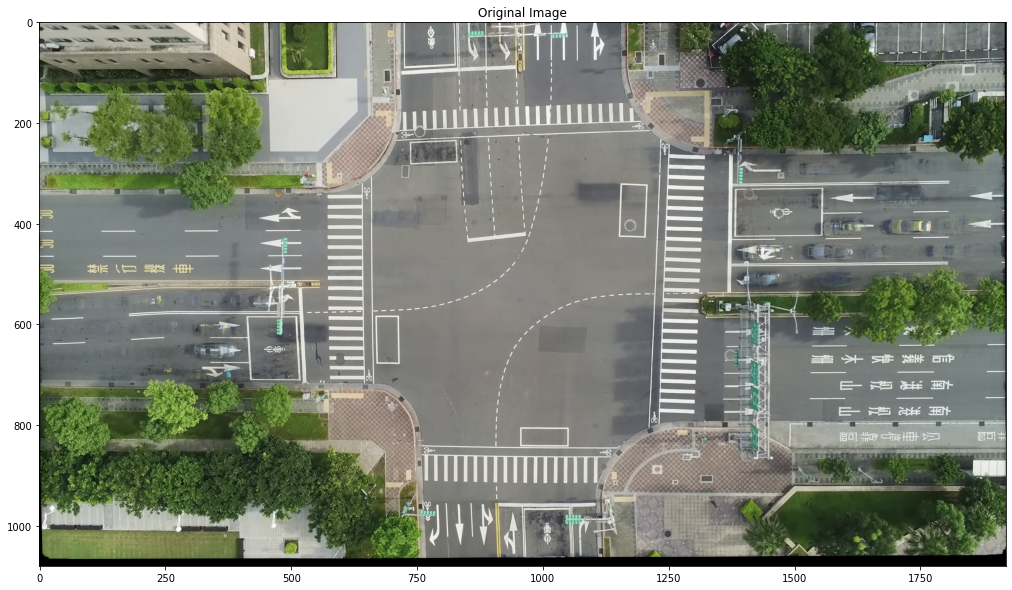

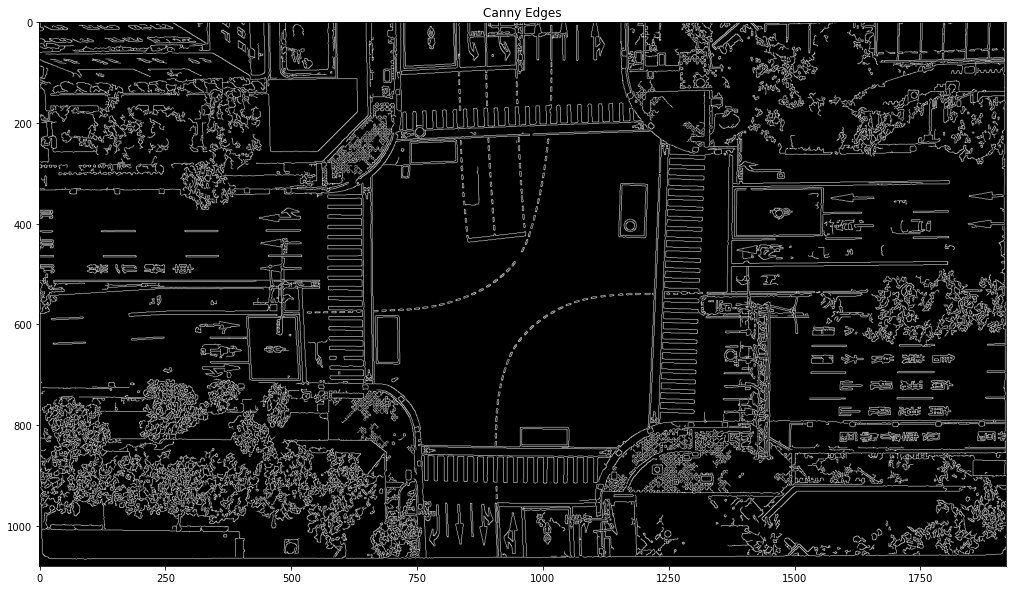

<Figure size 432x288 with 0 Axes>

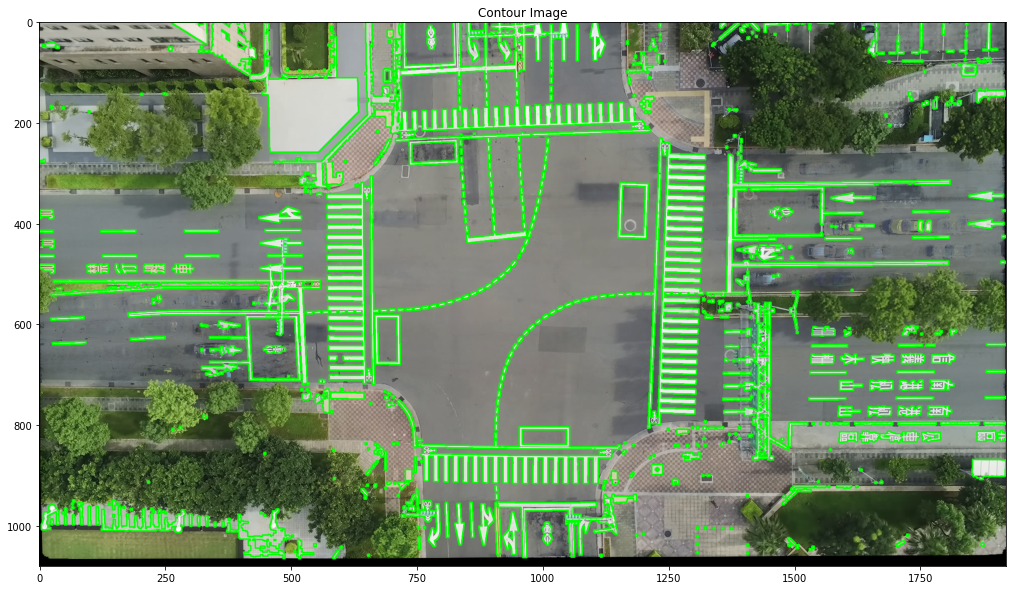

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the uploaded image
image_path = r"D:\SAM\notebooks\images\road1.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge detection using Canny
edges = cv2.Canny(blurred, 50, 150)

# Thresholding to segment road markings
_, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Hough Transform for line detection
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=50)

# Morphological operations to clean up the image
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(thresholded, kernel, iterations=1)

# Find contours to detect road markings
contours, _ = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Plot original image and processed images
plt.figure(figsize=(20,10))

# plt.subplot(1, 3, 1)
plt.tight_layout()
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
# 
# plt.subplot(1, 3, 2)
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.show()

# plt.subplot(1, 3, 3)
plt.tight_layout()
plt.figure(figsize=(20,10))
plt.title('Contour Image')
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.show()

